In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from pathlib import Path

plot_dir = Path('..', 'results')

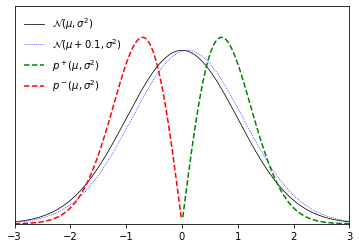

In [3]:
linspace = np.linspace(-3, 3, 200)
norm_pdf = scipy.stats.norm.pdf(linspace, 0, 1)
dweibull_pdf = scipy.stats.dweibull.pdf(linspace, 2)
pneg_pdf,ppos_pdf = np.array_split(dweibull_pdf, 2)
linspace_low, linspace_high = np.array_split(linspace, 2)

fig,ax = plt.subplots()

ax.tick_params(left=False)
ax.set(yticklabels=[])
for spine in ax.spines:
    ax.spines[spine].set_visible=False

ax.plot(linspace, norm_pdf, label='$\mathcal{N}(\mu,\sigma^2)$', color='black', linewidth=.75)
ax.plot(linspace + .1, norm_pdf, linestyle='dotted', label='$\mathcal{N}(\mu + 0.1,\sigma^2)$', color='blue', linewidth=.75)
ax.plot(linspace_high, ppos_pdf, linestyle='dashed', label='$p^+(\mu,\sigma^2)$', color='green')
ax.plot(linspace_low, pneg_pdf, linestyle='dashed', label='$p^-(\mu,\sigma^2)$', color='red')

plt.xlim(-3, 3)
plt.ylim(0, .5)
plt.legend(frameon=False, loc='upper left')
plt.savefig(plot_dir / 'gaussian-mvd-mean-pdf.pdf')

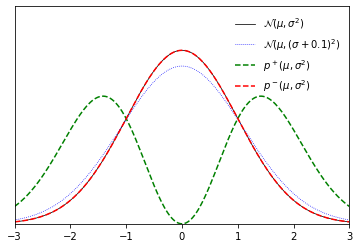

In [9]:
linspace = np.linspace(-3, 3, 200)
norm_pdf = scipy.stats.norm.pdf(linspace, 0, 1)
norm_pdf_var_shift = scipy.stats.norm.pdf(linspace, 0, 1.1)
linspace_low, linspace_high = np.array_split(linspace, 2)

ppos_right_pdf = scipy.stats.maxwell.pdf(linspace_high, 0, 1)
ppos_left_pdf = np.flip(ppos_right_pdf)
ppos_pdf = np.concatenate((ppos_left_pdf, ppos_right_pdf)) / 2
pneg_pdf = scipy.stats.norm.pdf(linspace, 0, 1)

fig,ax = plt.subplots()

ax.tick_params(left=False)
ax.set(yticklabels=[])

ax.plot(linspace, norm_pdf, label='$\mathcal{N}(\mu,\sigma^2)$', color='black', linewidth=.75)
ax.plot(linspace, norm_pdf_var_shift, linestyle='dotted', label='$\mathcal{N}(\mu,(\sigma + 0.1)^2)$', color='blue', linewidth=.75)
ax.plot(linspace, ppos_pdf, linestyle='dashed', label='$p^+(\mu,\sigma^2)$', color='green')
ax.plot(linspace, norm_pdf, linestyle='dashed', label='$p^-(\mu,\sigma^2)$', color='red')

plt.xlim(-3, 3)
plt.ylim(0, .5)
plt.legend(frameon=False)
plt.savefig(plot_dir / 'gaussian-mvd-std-pdf.pdf')